<a href="https://www.kaggle.com/code/ashadullah/weather-forecasting?scriptVersionId=165740405" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-forecasting-indias-weather/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

**Preprocessing**

In [3]:
df = pd.read_csv('/kaggle/input/ml-olympiad-forecasting-indias-weather/NM Weather Data in India from 1901 to 2017 - Weather Data in India from 1901 to 2017.csv')

In [4]:
df

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,2013,18.88,21.07,24.53,26.97,29.06,28.24,27.50,27.22,26.87,25.63,22.18,19.69
113,113,2014,18.81,20.35,23.34,26.91,28.45,29.42,28.07,27.42,26.61,25.38,22.53,19.50
114,114,2015,19.02,21.23,23.52,26.52,28.82,28.15,28.03,27.64,27.04,25.82,22.95,20.21
115,115,2016,20.92,23.58,26.61,29.56,30.41,29.70,28.18,28.17,27.72,26.81,23.90,21.89


In [5]:
df.shape

(117, 14)

In [6]:
df.columns

Index(['ID', 'YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12'],
      dtype='object')

In [7]:
df.isnull().sum()

ID      0
YEAR    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of       ID  YEAR      1      2      3      4      5      6      7      8      9  \
0      0  1901  17.99  19.43  23.49  26.41  28.28  28.60  27.49  26.98  26.26   
1      1  1902  19.00  20.39  24.10  26.54  28.68  28.44  27.29  27.05  25.95   
2      2  1903  18.32  19.79  22.46  26.03  27.93  28.41  28.04  26.63  26.34   
3      3  1904  17.77  19.39  22.95  26.73  27.83  27.85  26.84  26.73  25.84   
4      4  1905  17.40  17.79  21.78  24.84  28.32  28.69  27.67  27.47  26.29   
..   ...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
112  112  2013  18.88  21.07  24.53  26.97  29.06  28.24  27.50  27.22  26.87   
113  113  2014  18.81  20.35  23.34  26.91  28.45  29.42  28.07  27.42  26.61   
114  114  2015  19.02  21.23  23.52  26.52  28.82  28.15  28.03  27.64  27.04   
115  115  2016  20.92  23.58  26.61  29.56  30.41  29.70  28.18  28.17  27.72   
116  116  2017  20.59  23.08  25.58  29.17  30.47  29.44  28.31  28.12  28.11

In [9]:
df.describe()

,ID,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,58.000000,1959.000000,18.423248,20.137949,23.434188,26.514103,28.386410,28.300940,27.369231,26.940085,26.342650,24.742051,21.765726,19.173333
std,33.919021,33.919021,0.612963,0.900944,0.862825,0.750740,0.644678,0.460603,0.345920,0.348876,0.387789,0.563152,0.634183,0.635912
min,0.000000,1901.000000,17.250000,17.790000,21.780000,24.840000,26.970000,27.330000,26.480000,26.210000,25.470000,23.520000,20.590000,17.980000
25%,29.000000,1930.000000,18.070000,19.470000,22.840000,26.000000,27.950000,28.020000,27.150000,26.730000,26.110000,24.390000,21.320000,18.780000
50%,58.000000,1959.000000,18.350000,19.990000,23.330000,26.540000,28.340000,28.250000,27.340000,26.900000,26.310000,24.670000,21.720000,19.180000
75%,87.000000,1988.000000,18.720000,20.550000,23.930000,26.910000,28.820000,28.580000,27.530000,27.150000,26.500000,24.920000,22.150000,19.550000
max,116.000000,2017.000000,20.920000,23.580000,26.610000,29.560000,30.780000,29.880000,28.470000,28.170000,28.110000,27.240000,23.920000,21.890000


In [10]:
df.drop(['ID'], axis = 1, inplace = True)

In [11]:
df.head()

,YEAR,1,2,3,4,5,6,7,8,9,10,11,12
0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [12]:
df.columns

Index(['YEAR', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'], dtype='object')

**EDA**

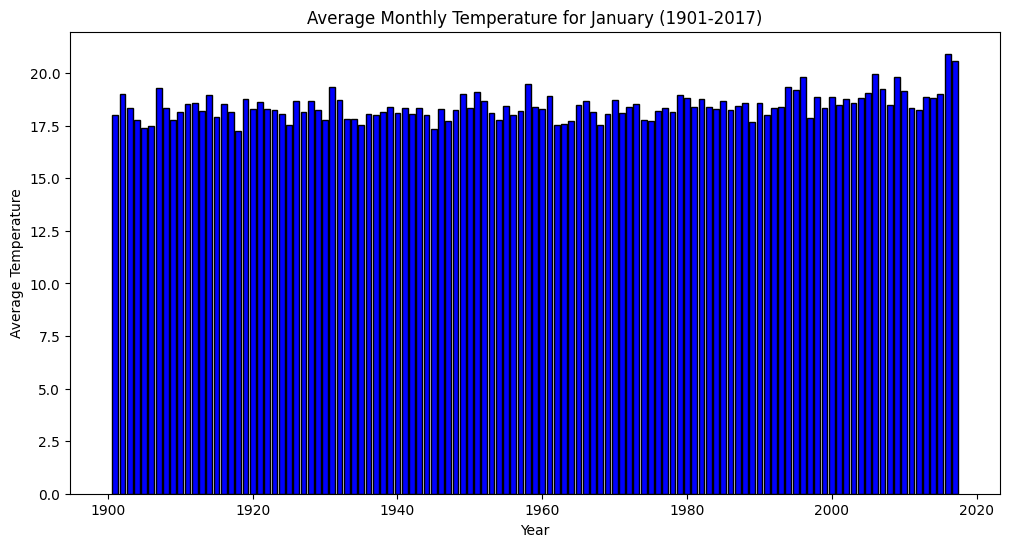

In [13]:
# Plotting the average temperature for January over the years
plt.figure(figsize=(12, 6))

# Selecting data for January ('1' column)
selected_data = df[['YEAR', '1']]

# Plotting the bar chart
plt.bar(selected_data['YEAR'], selected_data['1'], color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Monthly Temperature for January (1901-2017)')

# Show the plot
plt.show()


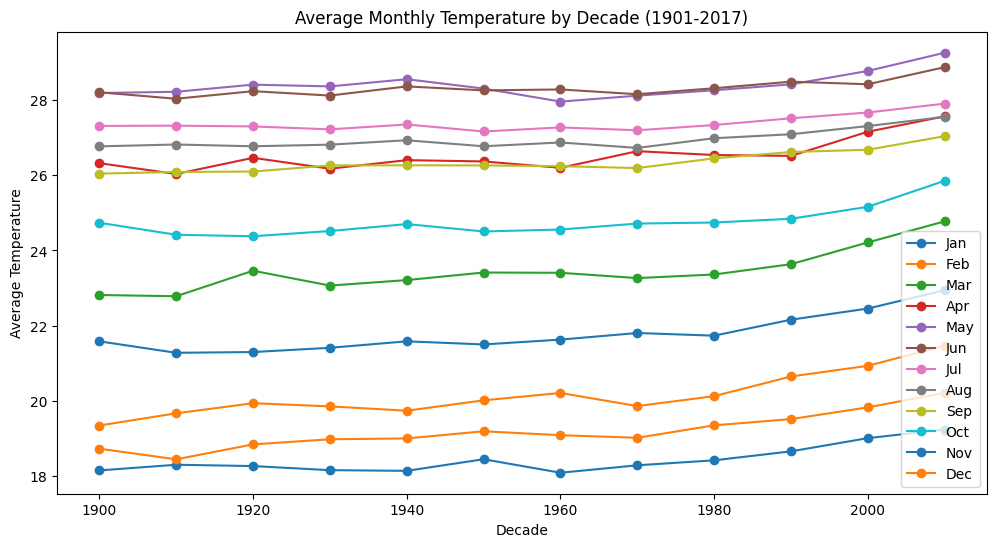

In [14]:
df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

# Group by decades and calculate the average temperature for each decade
df['Decade'] = df['YEAR'].dt.year // 10 * 10
decade_avg = df.groupby('Decade').mean()

# Plotting the average temperature for each decade
plt.figure(figsize=(12, 6))

# Using a line plot for better visualization
plt.plot(decade_avg.index, decade_avg[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']], marker='o')

# Adding labels and title
plt.xlabel('Decade')
plt.ylabel('Average Temperature')
plt.title('Average Monthly Temperature by Decade (1901-2017)')
plt.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()
